<a href="https://colab.research.google.com/github/TruongThanhNhan20146382/Nhan20146382/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [4]:
trainset='/content/drive/MyDrive/AI_bt/money'

In [5]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(100,100),
                                     batch_size=128,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(100,100),
                                              batch_size=128,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 780 images belonging to 5 classes.
Found 86 images belonging to 5 classes.


In [6]:
{'.ipynb_checkpoints': 0,
 '20k': 1,
 '50k': 2,
 '100k': 3,
 '200k': 4,
 '500k': 5
 }

{'.ipynb_checkpoints': 0, '20k': 1, '50k': 2, '100k': 3, '200k': 4, '500k': 5}

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(100,100,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_dataset,batch_size=128,epochs=50,verbose=1,validation_data=validation_set)

Epoch 1/50
7/7 [==============================] - 348s 45s/step - loss: 3.6850 - accuracy: 0.2231 - val_loss: 1.5965 - val_accuracy: 0.2326
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 1.5771 - accuracy: 0.3128 - val_loss: 1.4813 - val_accuracy: 0.4651
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 1.5538 - accuracy: 0.3756 - val_loss: 1.6030 - val_accuracy: 0.2326
Epoch 4/50
7/7 [==============================] - 8s 1s/step - loss: 1.6037 - accuracy: 0.2256 - val_loss: 1.6040 - val_accuracy: 0.2326
Epoch 5/50
7/7 [==============================] - 9s 2s/step - loss: 1.6016 - accuracy: 0.2269 - val_loss: 1.5942 - val_accuracy: 0.2326
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 1.5924 - accuracy: 0.2385 - val_loss: 1.5859 - val_accuracy: 0.2326
Epoch 7/50
7/7 [==============================] - 8s 1s/step - loss: 1.5937 - accuracy: 0.2346 - val_loss: 1.5891 - val_accuracy: 0.2326
Epoch 8/50
7/7 [======================

In [9]:
model.save('money.hs')

In [10]:
model3=load_model('money.hs')

In [18]:
label = ['100k', '200k', '20k', '500k', '50k']

1/1 [==============================] - 0s 21ms/step
50k


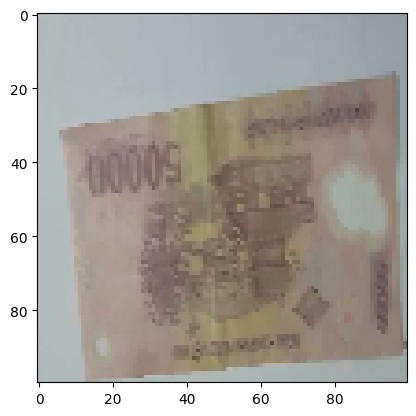

In [19]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/money/4281587786767_021.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 37ms/step
100k


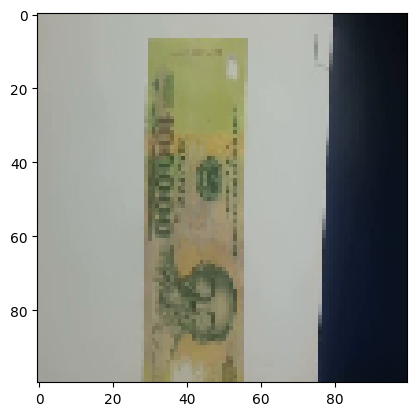

In [20]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/money/4281583518054_053.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 21ms/step
100k


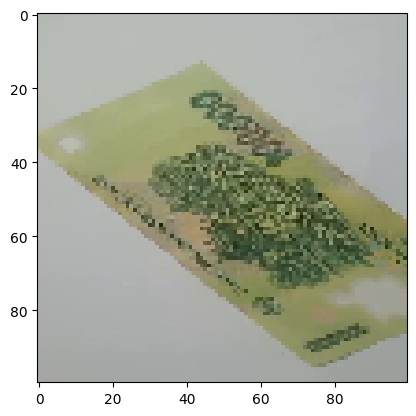

In [21]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array
img = load_img('/content/drive/MyDrive/AI_bt/test/money/4281584307444_025.jpg', target_size = (100,100))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3) 
img = img.astype('float32')
img = img/255
print(label[np.argmax(model.predict(img))])